In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5

/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5


In [ ]:
!unzip -q /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/data_traffic-signs.zip -d /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5

### Clone mô hình YOLOv5 về Drive

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5

/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5


In [ ]:
%pip install -qr requirements.txt  # install dependencies

In [ ]:
!pip install opencv-python
!pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.7 MB/s eta 0:00:00


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.0+cu121 (CPU)


### Tổng quan về giữ liệu

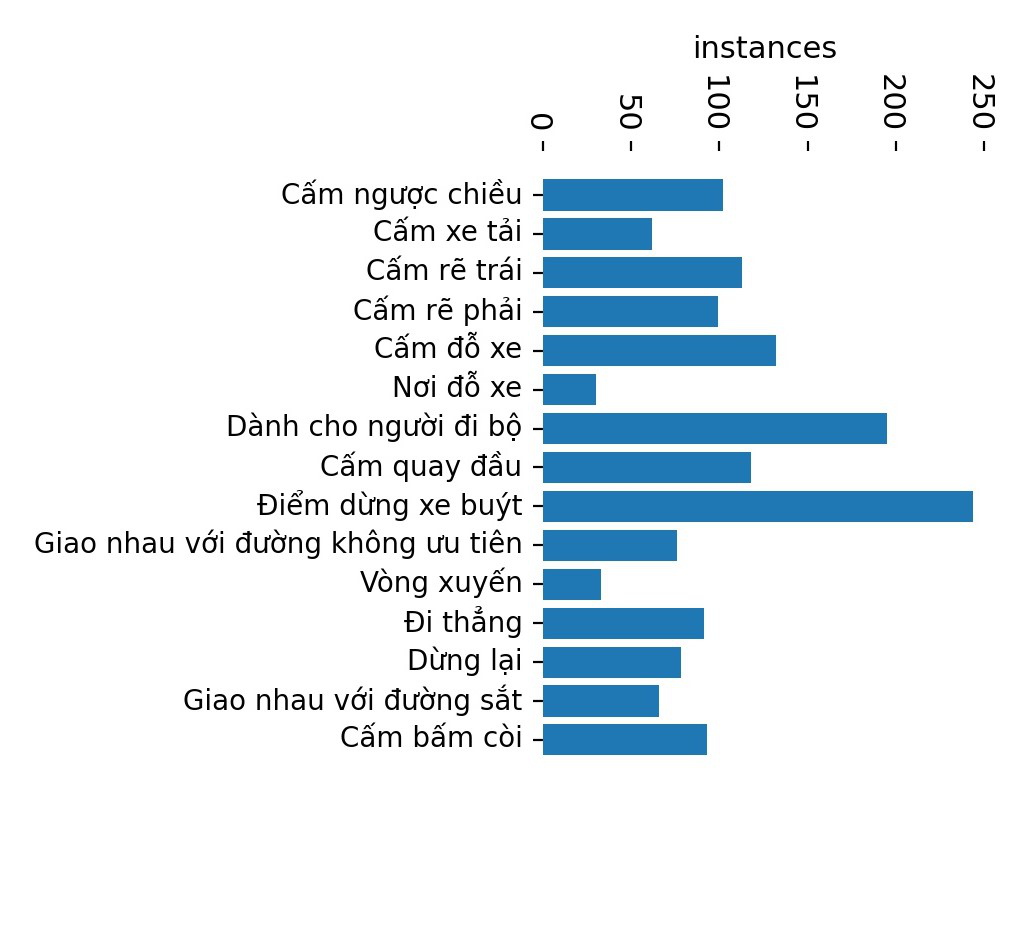

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/YOLO/labels.jpg')

### Train mô hình

Các thông tin cần lưu ý khi train:

*   train.py : đường dẫn đến file train.py của YOLOv5 mà ta đã clone trước đó.
*  --img: chỉnh size của ảnh

*  --batch : batch-size


*  --epochs : số epoch train ( ở bài này chúng em chọn train 50 epochs)

*  --data : đường dẫn đến file thông tin để mô hình có thể đọc được data đã chuẩn bị
*  --weights : khởi tạo trọng số ban đầu là yolov5s.pt









In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/train.py --img 640 --batch 3 --epochs 50 --data /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/data_info.yaml --weights /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp6/weights/best.pt --cache

2024-06-15 13:56:46.662336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 13:56:46.662405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 13:56:46.664827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp6/weights/best.pt, cfg=, data=/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/data_info.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=3, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, 

### **Chú ý** : Thông số train được sẽ được lưu vào đường dẫn
### yolov5/runs/train/exp5

### Trực quan hoá mô hình

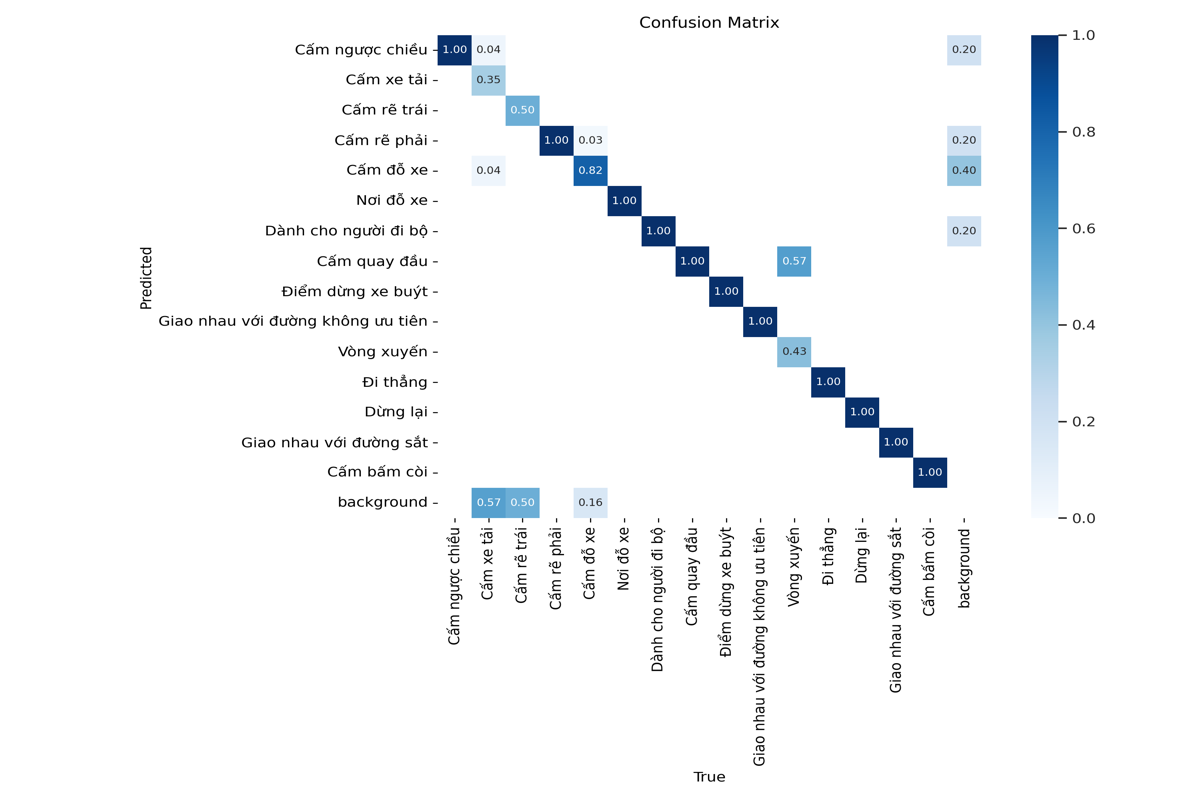

In [ ]:
from PIL import Image
im=Image.open('/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp6/confusion_matrix.png')
im.resize((1200,800))

### Dự đoán

In [ ]:
!python /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/detect.py --weights /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp6/weights/best.pt --img 640 --conf 0.1 --source /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test

detect: weights=['/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/3 /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test/Bản sao của 15-6_jpg.rf.eb1e0047af1dff2fa982141ad6bf10e1.jpg: 640x640 1 Đi thẳng, 1 Cấm bấm còi, 394.2ms
image 2/3 /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test/Bản

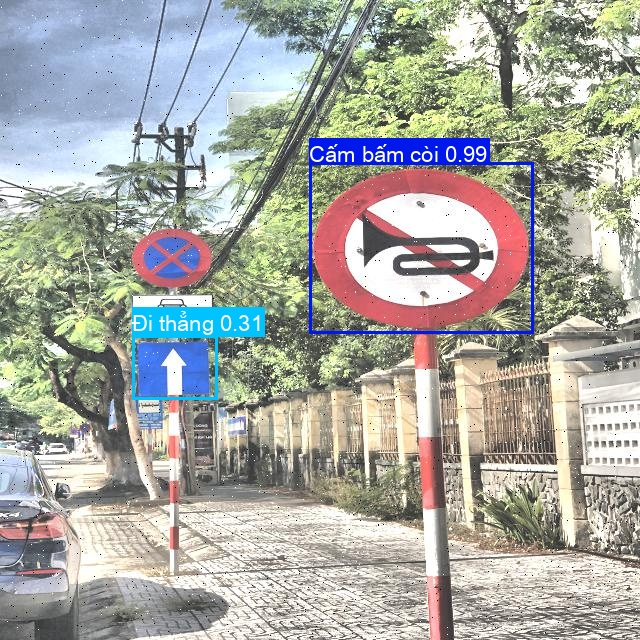

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/detect/exp5/Bản sao của 15-6_jpg.rf.eb1e0047af1dff2fa982141ad6bf10e1.jpg')

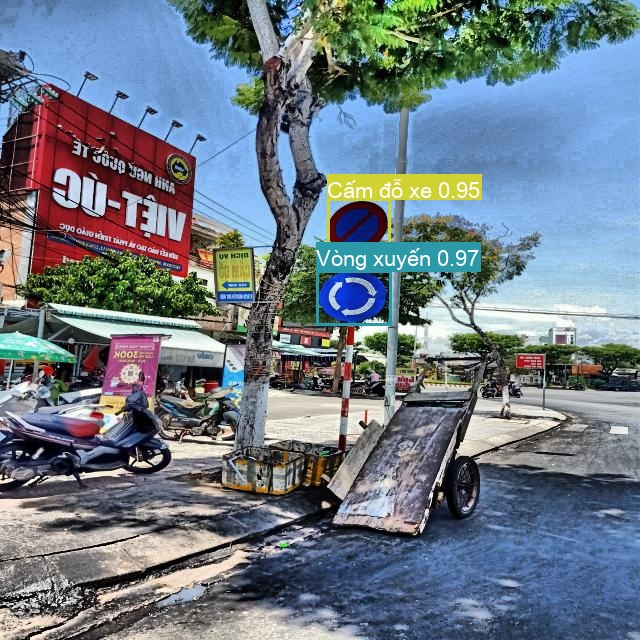

In [ ]:
2Image(filename='/content/drive/MyDrive/CDIO/YOLO/yolov5/runs/detect/exp6/11-7_jpg.rf.ae4d80a0489bbd7c0c2e30321582c526.jpg')